# Poisson Regression
we are building a poisson regression model on the **student awards** dataset.The dataset contains two variaables - awards won and math score

## Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [6]:
# fetching data
df = pd.read_csv("competition_awards_data.csv")

In [8]:
df.head()

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


In [12]:
#number of observation
df.shape

(200, 2)

In [14]:
#checking null values
df.isnull().sum()   

Awards        0
Math Score    0
dtype: int64

There is no null values

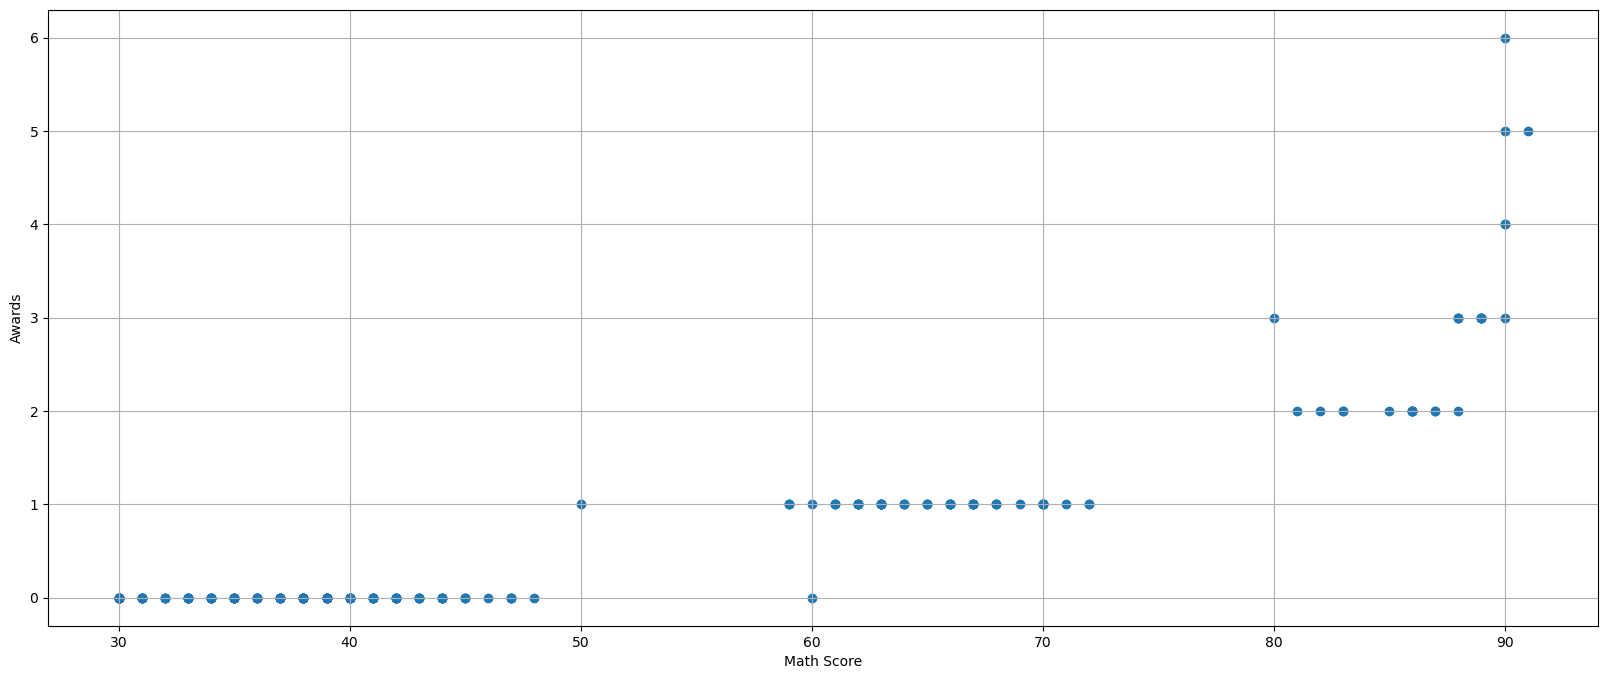

In [19]:
#plotting awards agains Math score
fig, ax = plt.subplots(figsize=(20,8))
plt.grid()
ax.set_ylabel("Awards")
ax.set_xlabel("Math Score")
ax.scatter(df['Math Score'], df.Awards)
plt.show()

### Train Test Split


In [25]:
from sklearn.model_selection import train_test_split

In [32]:
train, test = train_test_split(df, train_size = .8, random_state = 1)

In [34]:
print(len(train))

160


In [36]:
print(len(test))

40


In [38]:
#define X and y for training and test
X_train = train['Math Score'].values.reshape(-1, 1)
y_train = train.Awards

X_train.shape,y_train.shape

((160, 1), (160,))

In [42]:
X_test = test['Math Score'].values.reshape(-1, 1)
y_test = test.Awards
X_test.shape,y_test.shape

((40, 1), (40,))

* Doing a polynomial regression: Comparing linear, quadratic and cubic fits
Pipeline helps you associate two models or objects to be built sequentially with each other, 
* in this case, PoissonRegressor() is the only object


In [47]:
pipeline = Pipeline([('model', PoissonRegressor())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred)

r2_test

0.8371373661390173

### Training performance

In [51]:
y_pred_train = pipeline.predict(X_train)
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_train

0.8586107885977592

### plot predictions and actual values against Math score

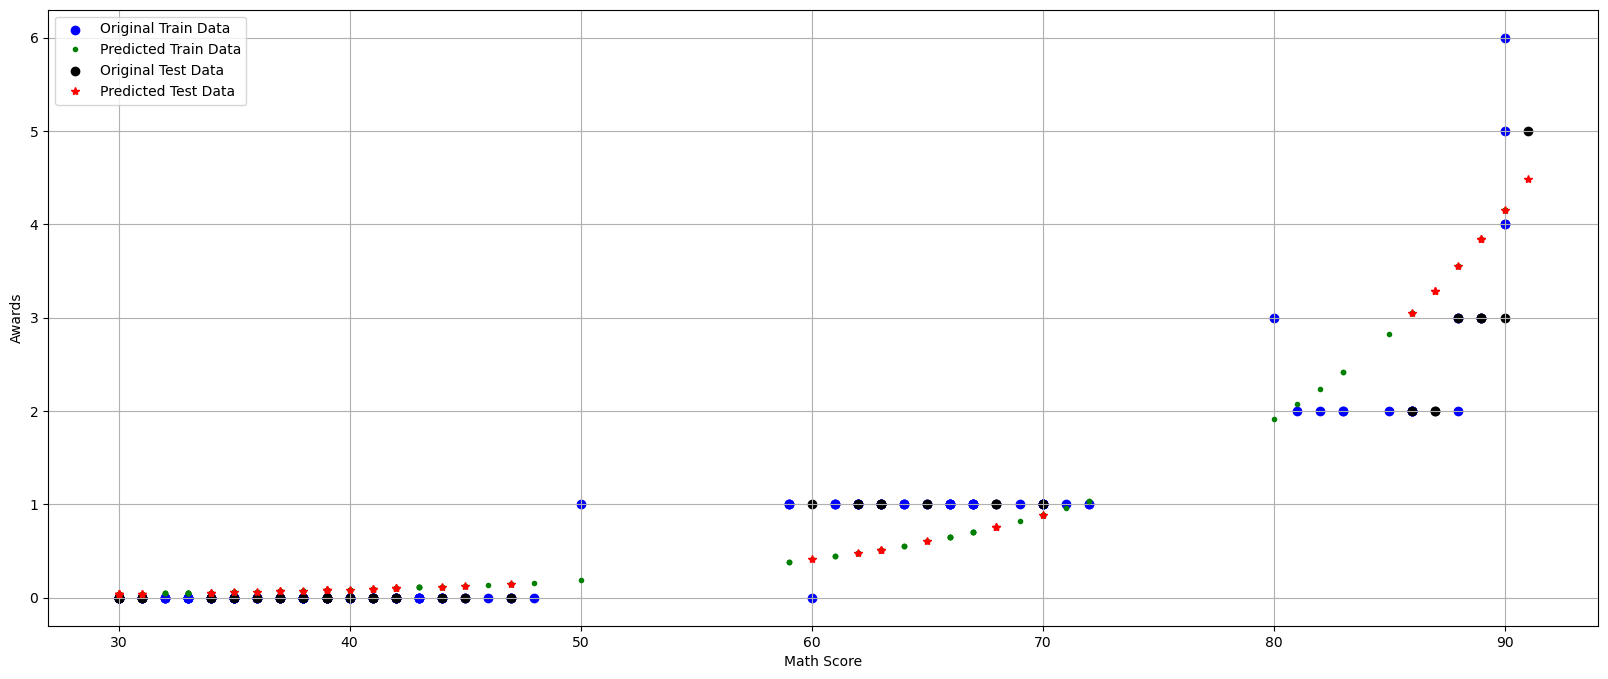

In [56]:
fig, ax = plt.subplots(figsize =(20,8))
plt.grid()
ax.set_xlabel("Math Score")
ax.set_ylabel("Awards")

#train data in blue
ax.scatter(X_train, y_train, color ='blue', label = "Original Train Data")
ax.plot(X_train, y_pred_train, "." ,color='green',label="Predicted Train Data")

#test data
ax.scatter(X_test, y_test, color='black', label ='Original Test Data')
ax.plot(X_test, y_pred, '*', color ='red', label ='Predicted Test Data')
ax.legend()
plt.show()

In [58]:
eval = pd.DataFrame({'y_pred' : [round(y,0) for y in y_pred], 'y' : y_test}).reset_index()
eval.head()

,index,y_pred,y
0,58,0.0,0
1,40,0.0,0
2,34,1.0,1
3,102,0.0,0
4,184,3.0,2


In [62]:
print('     Frequency table')
eval.groupby(['y', 'y_pred']).agg('count').reset_index().pivot(index='y', columns='y_pred', values='index').fillna(0)

     Frequency table


y_pred,0.0,1.0,3.0,4.0
y,,,,
0,24.0,0.0,0.0,0.0
1,2.0,6.0,0.0,0.0
2,0.0,0.0,3.0,0.0
3,0.0,0.0,0.0,4.0
5,0.0,0.0,0.0,1.0


### Great Job